In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import norm
%run Data_manipulation.ipynb

In [46]:
def plot_acf_pacf(data, lags=50):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    # Plot ACF for original data
    plot_acf(data, lags=lags, ax=axs[0], alpha=0.05)
    axs[0].set_title('ACF - Original Data')
    axs[0].set_xlabel('Lags')
    axs[0].set_ylabel('ACF')

    # Plot PACF for original data
    plot_pacf(data, lags=lags, ax=axs[1], alpha=0.05)
    axs[1].set_title('PACF - Original Data')
    axs[1].set_xlabel('Lags')
    axs[1].set_ylabel('PACF')

    plt.tight_layout()
    plt.show()

In [50]:
def detect_anomalies_arma(df, ar_lag=8, ma_lag=40, alpha=0.05):
    # Selecting the 'Close' column for anomaly detection
    data = df['Close'].values

    # Fit the ARMA model
    model = ARIMA(data, order=(ar_lag, 0, ma_lag))
    model_fit = model.fit()

    # Calculate residuals
    residuals = model_fit.resid
    arma = model_fit.fittedvalues

    # Detect anomalies
    mean_resid = np.mean(residuals)
    std_resid = np.std(residuals)
    threshold = norm.ppf(1 - alpha / 2) * std_resid
    anomalies = df[np.abs(residuals - mean_resid) > threshold]

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Close Price', color='blue')
    plt.plot(df.index, arma, label='ARMA', color='green')
    plt.scatter(anomalies.index, anomalies['Close'], color='red', label='Anomaly')
    plt.title('Time Series Data with Anomalies Detected using ARMA')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)
    plt.show()

    return anomalies

# NIFTY

In [51]:
# Detecting anomaly
NIFTY = pd.read_csv('D:/UFG/Data collection/NIFTY.csv')
NIFTY['Date']= pd.to_datetime(NIFTY['Date'], format='%Y-%m-%d')
#NIFTY.set_index('Date', inplace=True)

scaled_data, scaler = scale_data(NIFTY)
df_residuals, df_trend, df_seasonal, decomposition_results = transform_to_stationary(scaled_data)

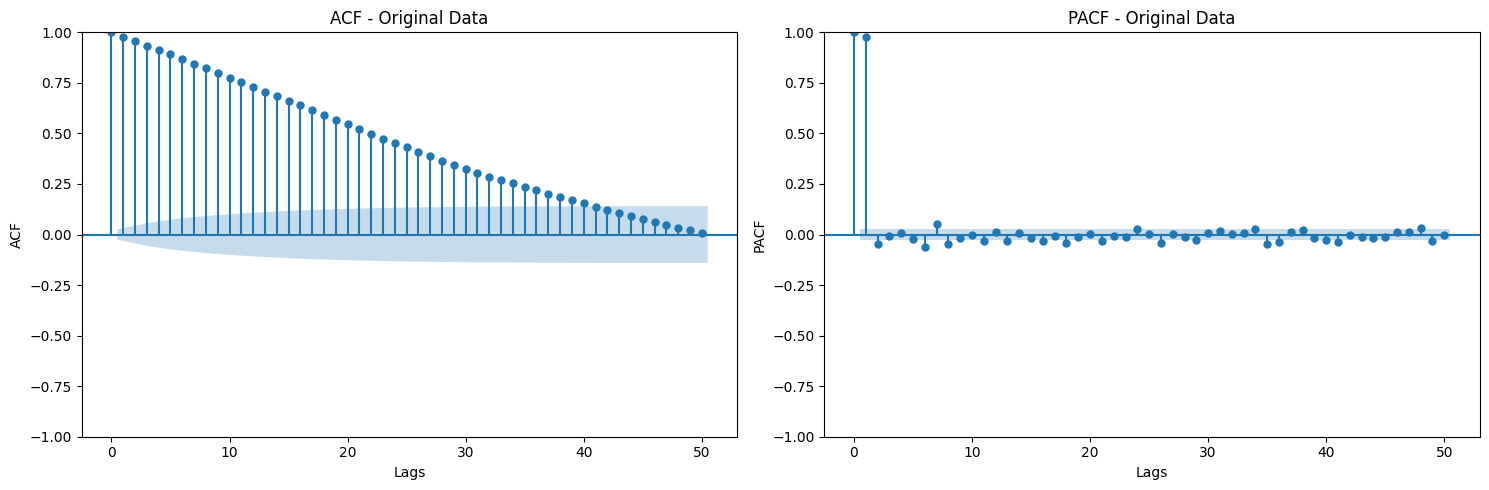

In [52]:
CF = plot_acf_pacf(df_residuals['Close'])

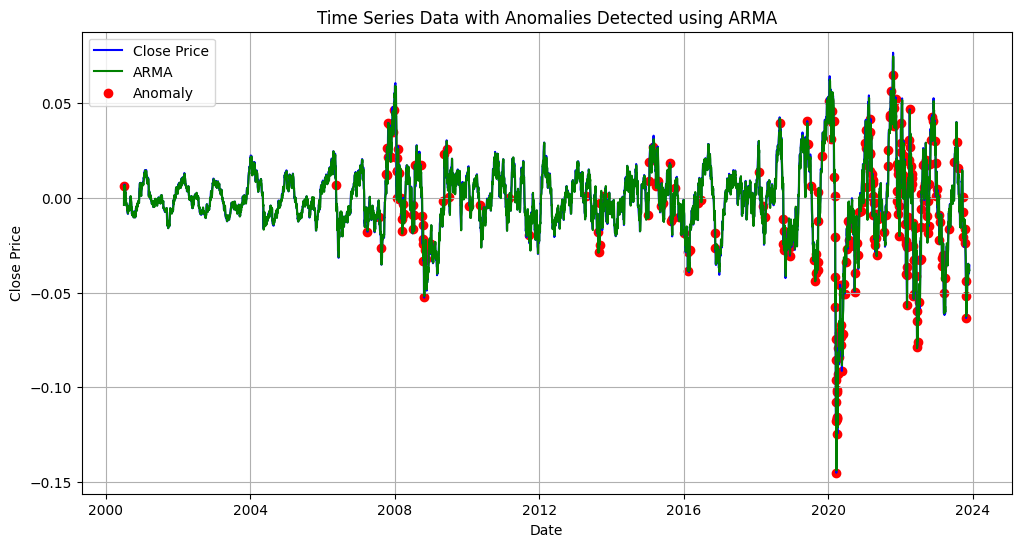

In [53]:
NIFTY_anomaly = detect_anomalies_arma(df_residuals)

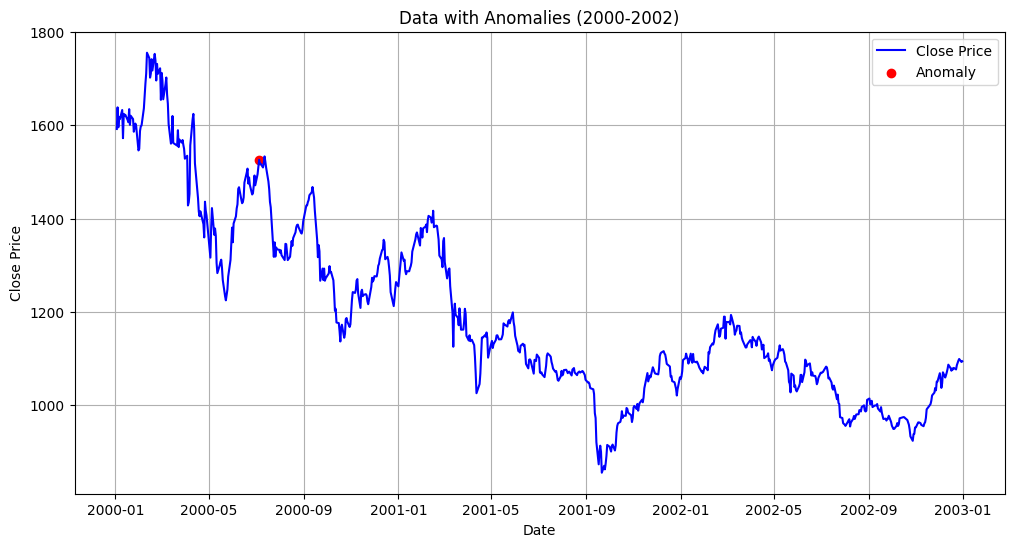

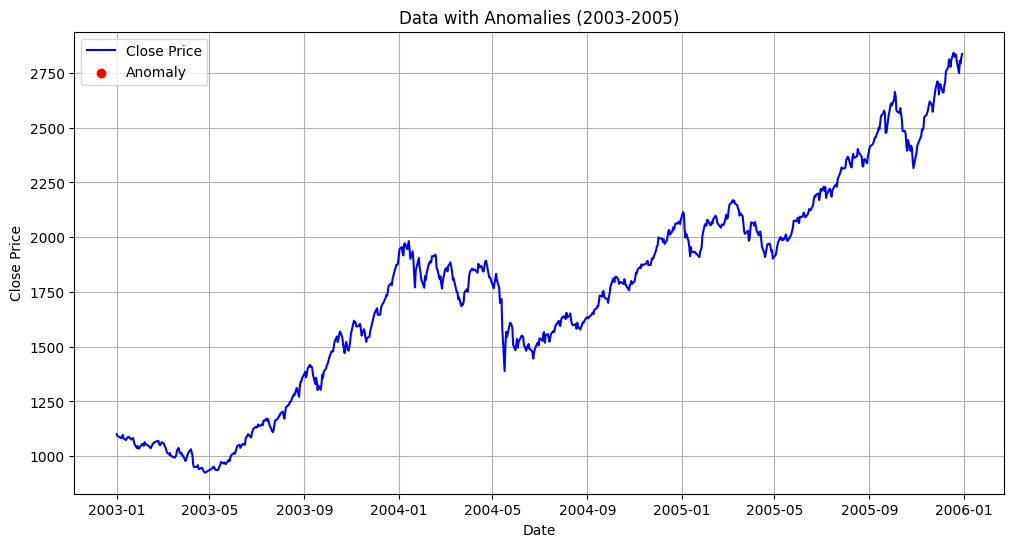

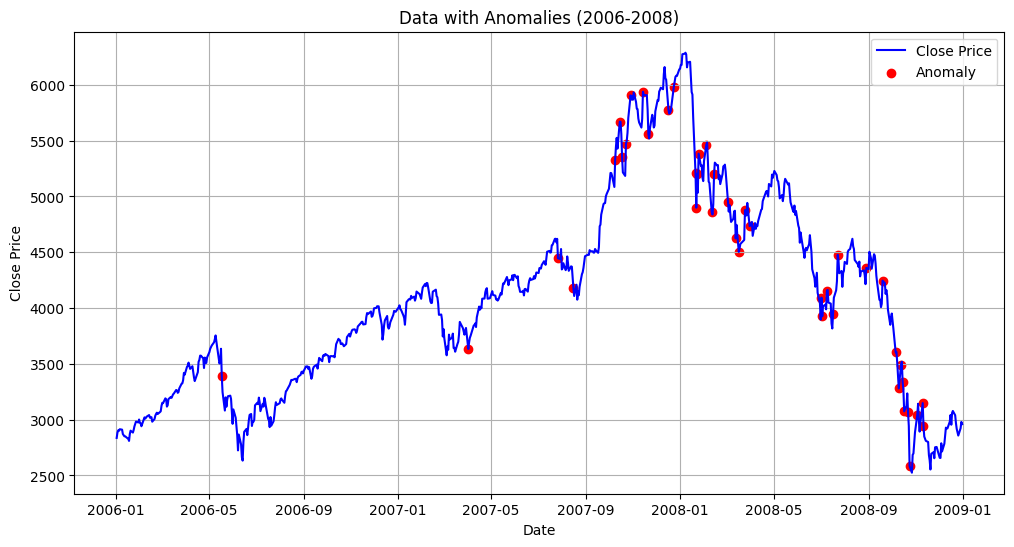

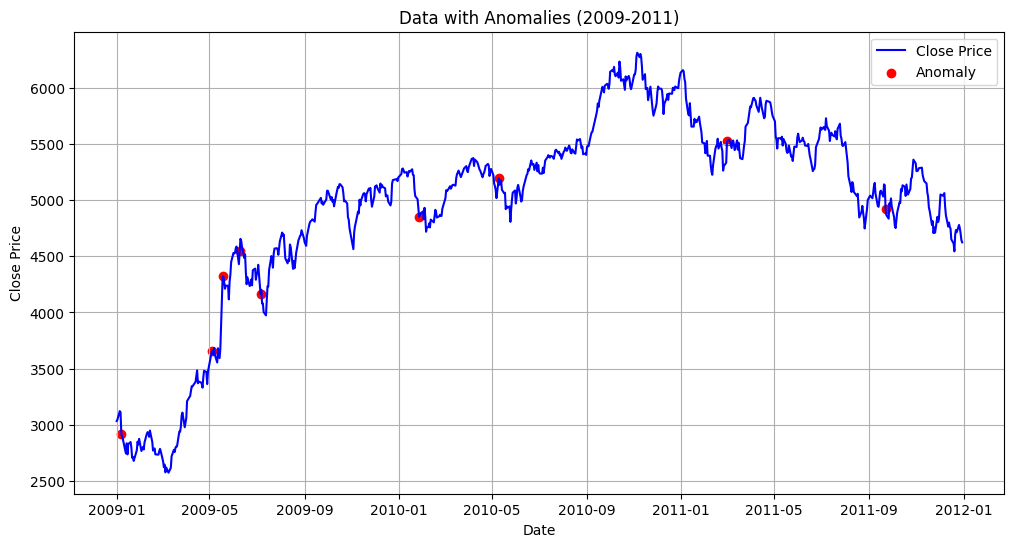

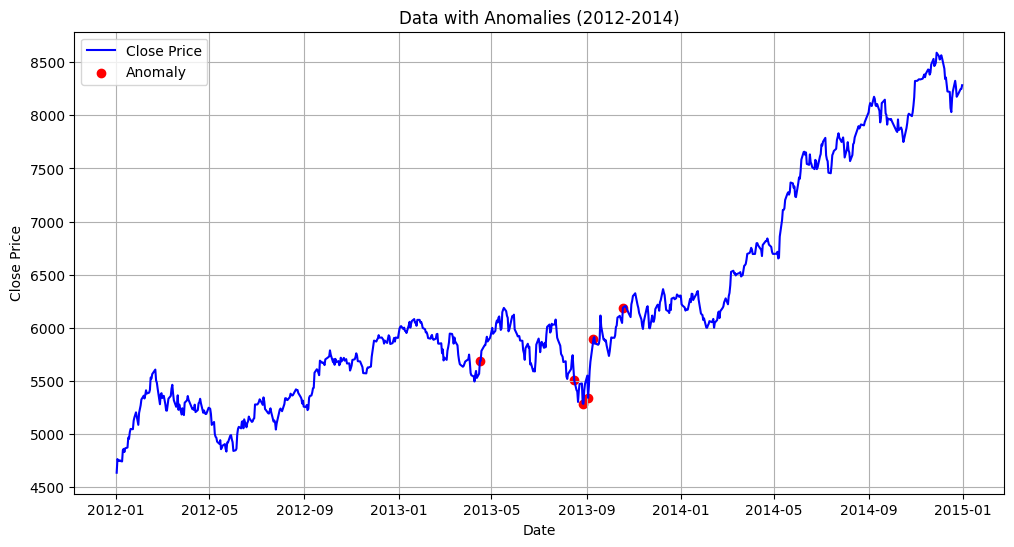

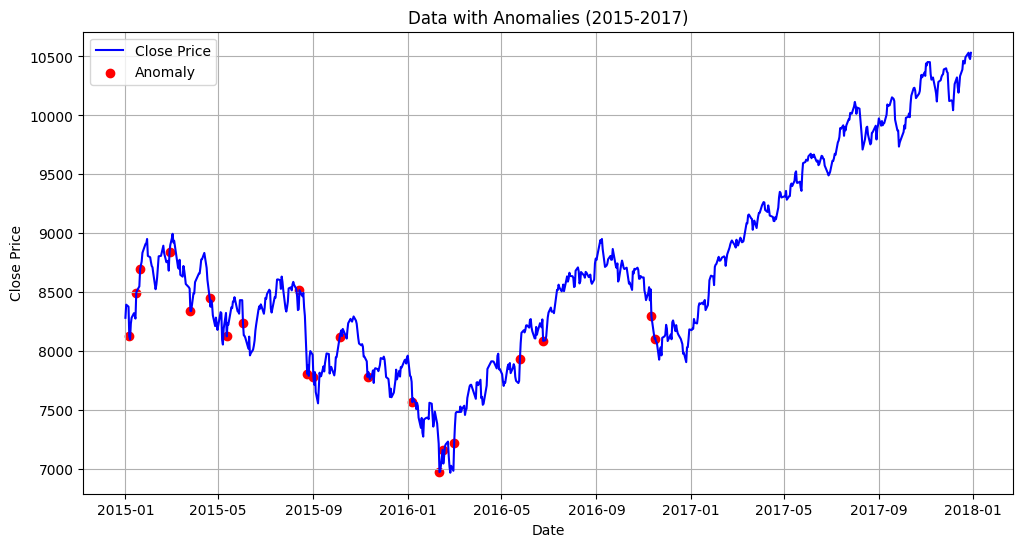

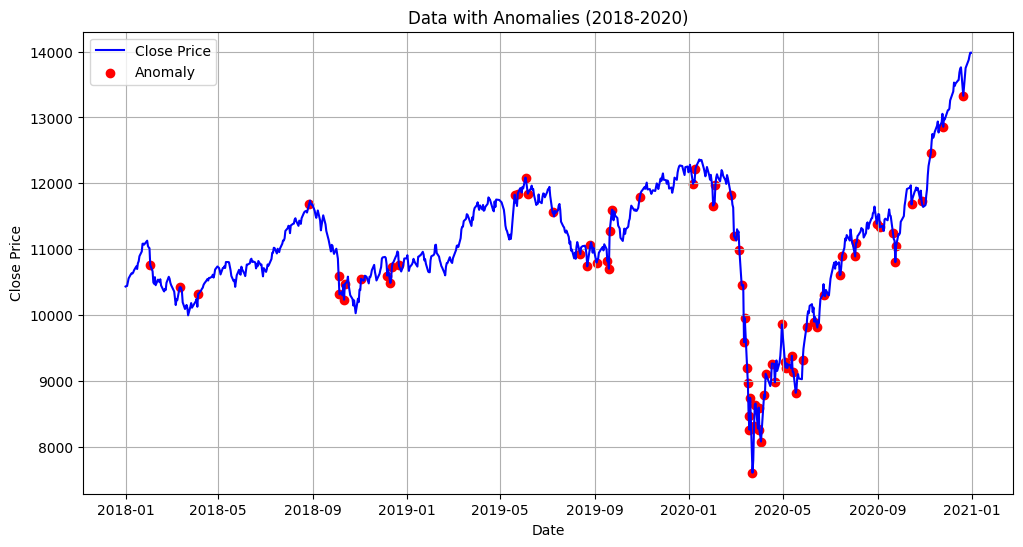

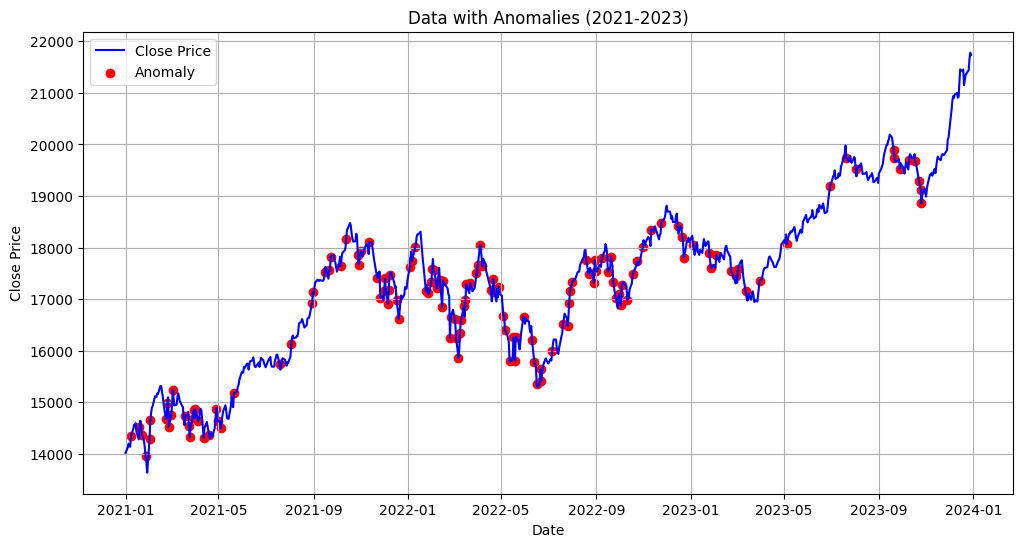

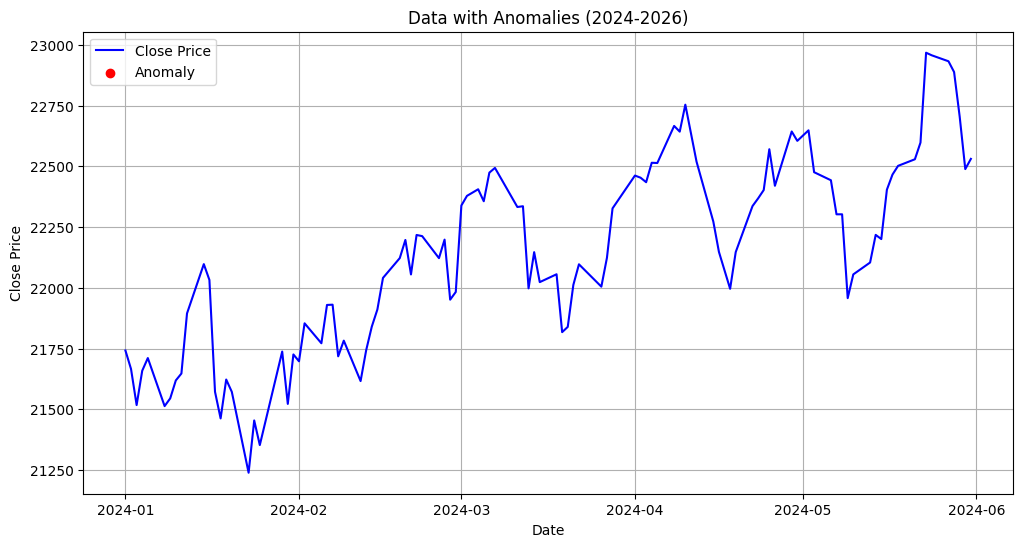

In [66]:
NIFTY_3 = plot_with_anomalies(NIFTY,NIFTY_anomaly, 3)

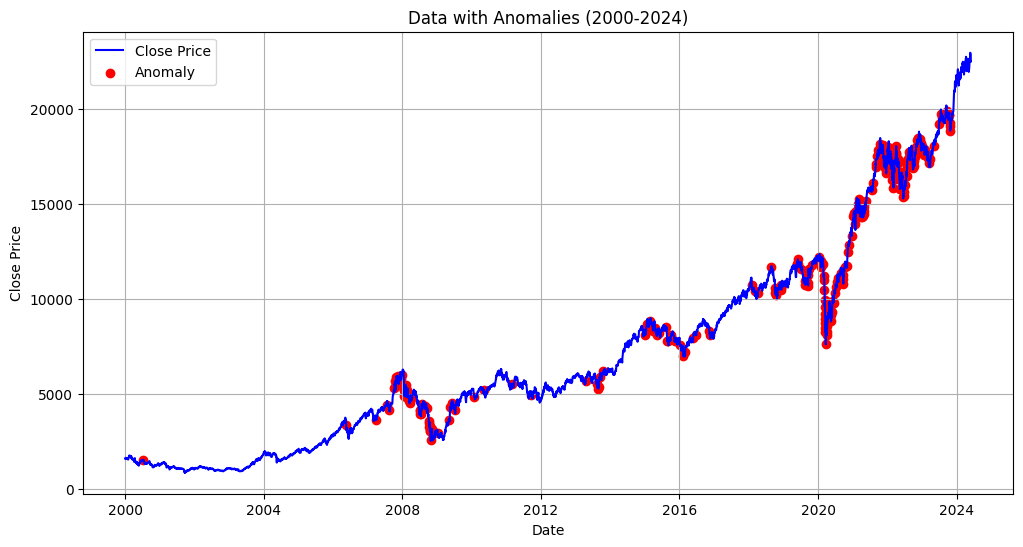

In [57]:
NIFTY_all = plot_with_anomalies(NIFTY,NIFTY_anomaly,25)

# IBOVESPA

In [58]:
# Detecting anomaly
IBOV = pd.read_csv('D:/UFG/Data collection/IBOV.csv')
IBOV['Date']= pd.to_datetime(IBOV['Date'], format='%Y-%m-%d')

scaled_data, scaler = scale_data(IBOV)
df_residuals, df_trend, df_seasonal, decomposition_results = transform_to_stationary(scaled_data)

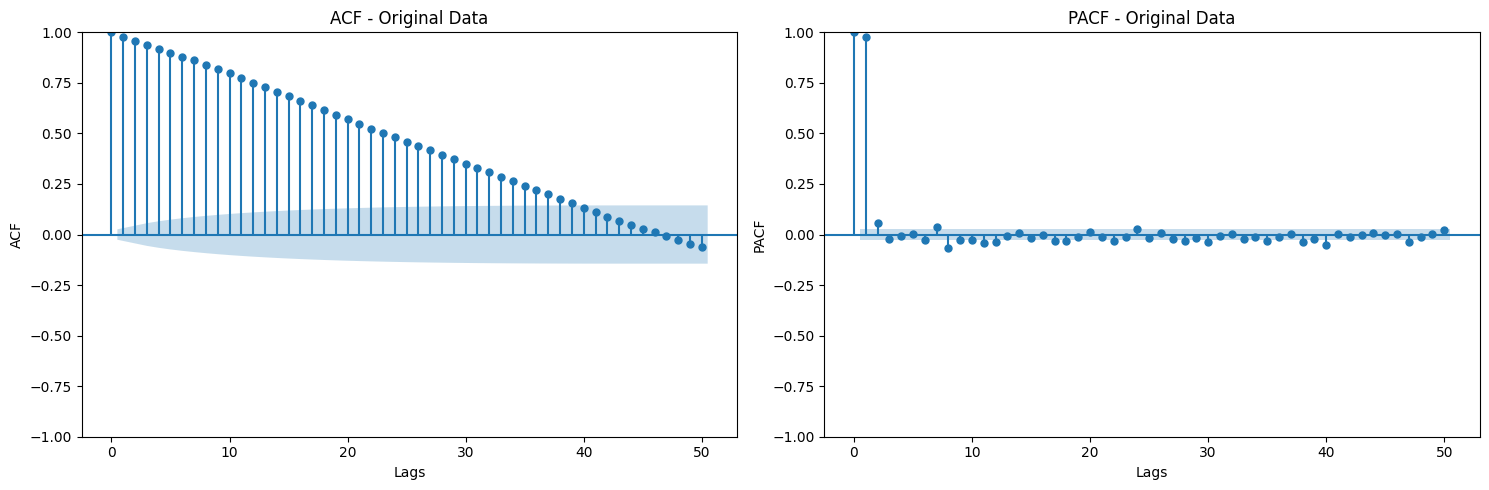

In [60]:
CF_IBOV = plot_acf_pacf(df_residuals['Close'])

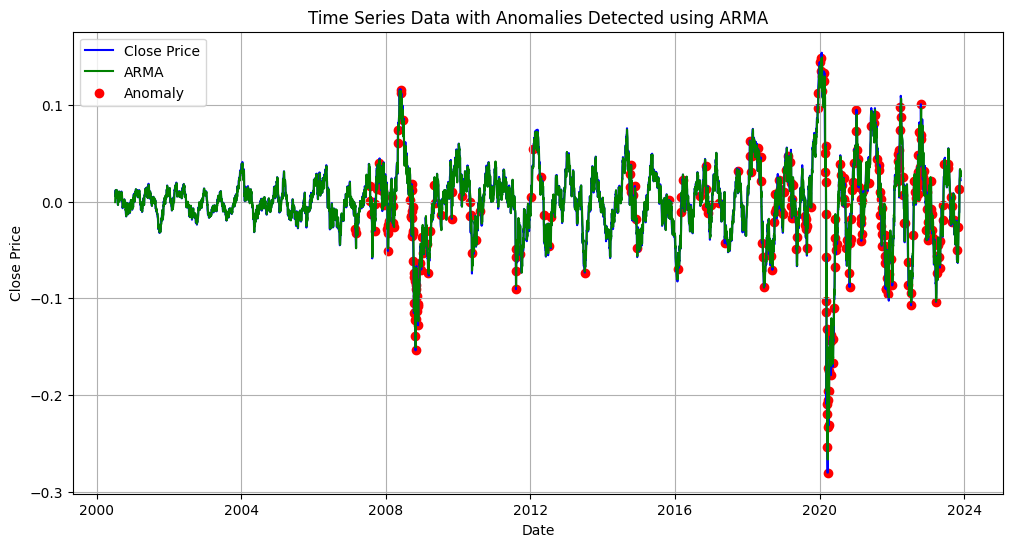

In [62]:
IBOV_anomaly = detect_anomalies_arma(df_residuals)

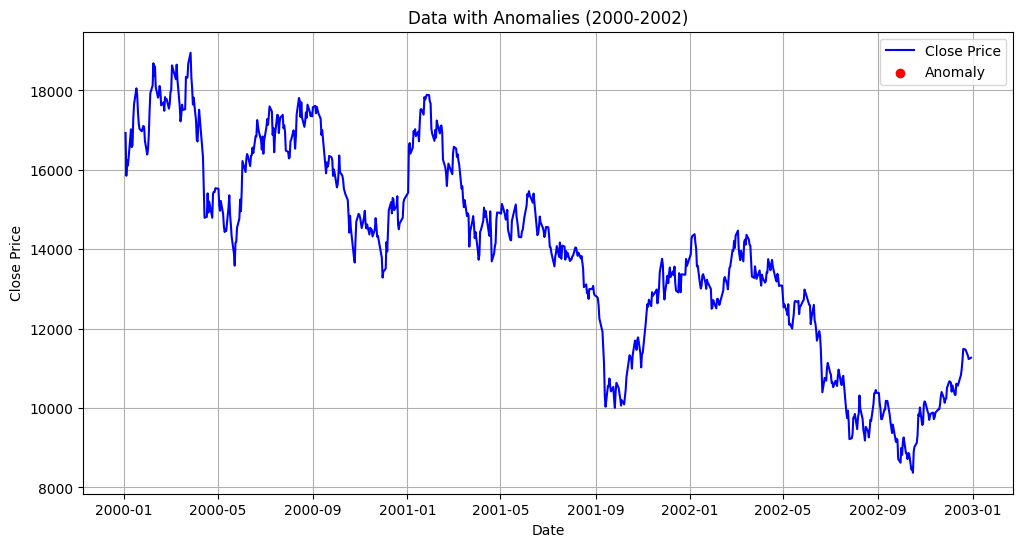

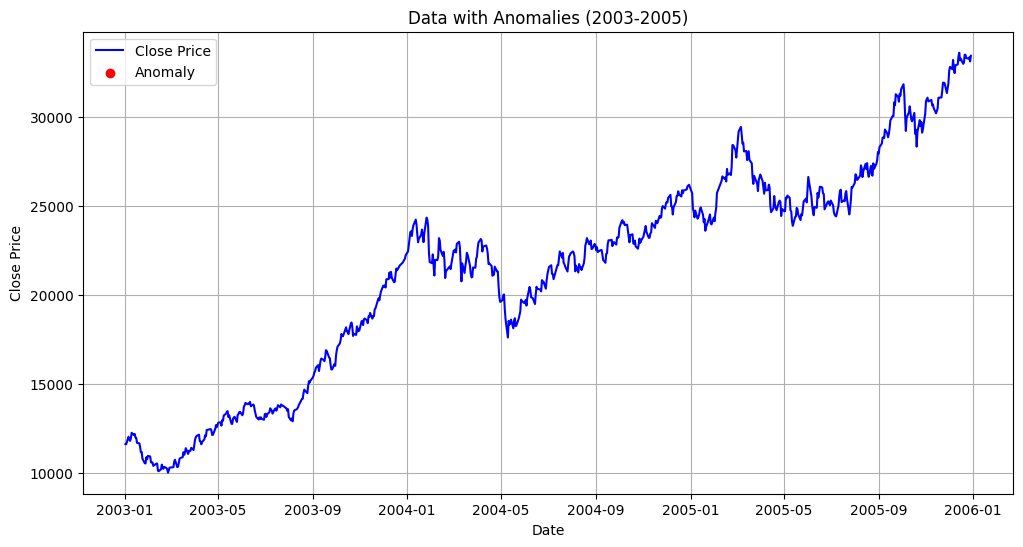

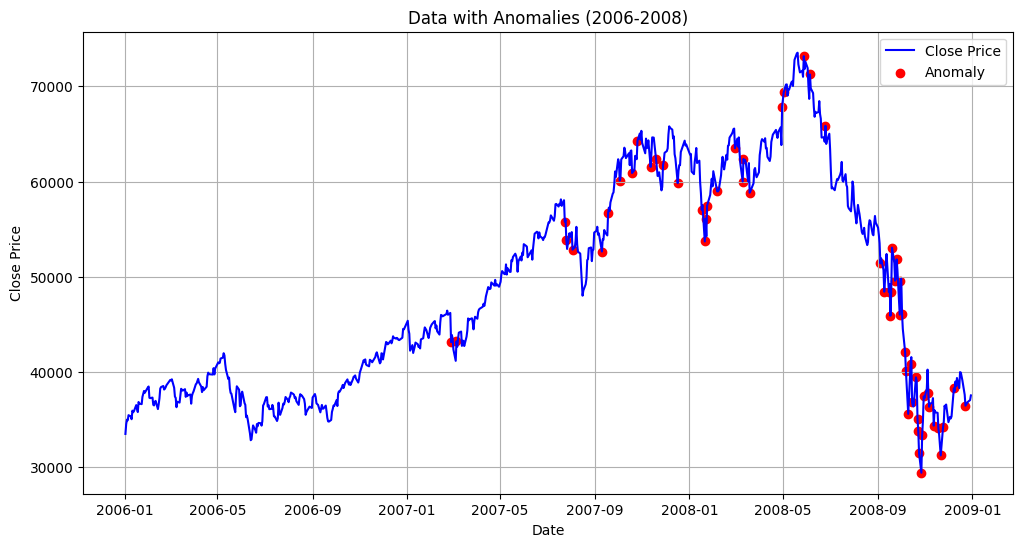

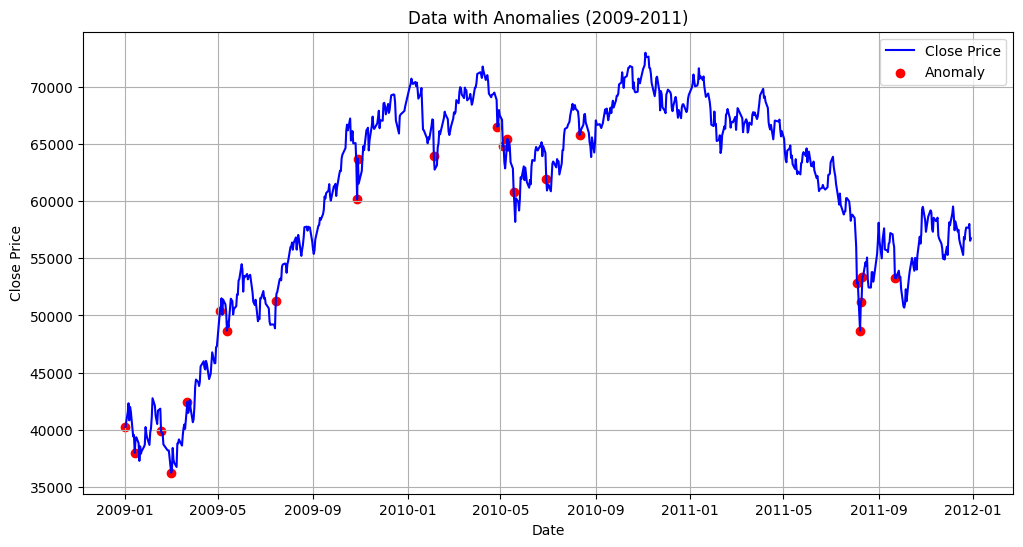

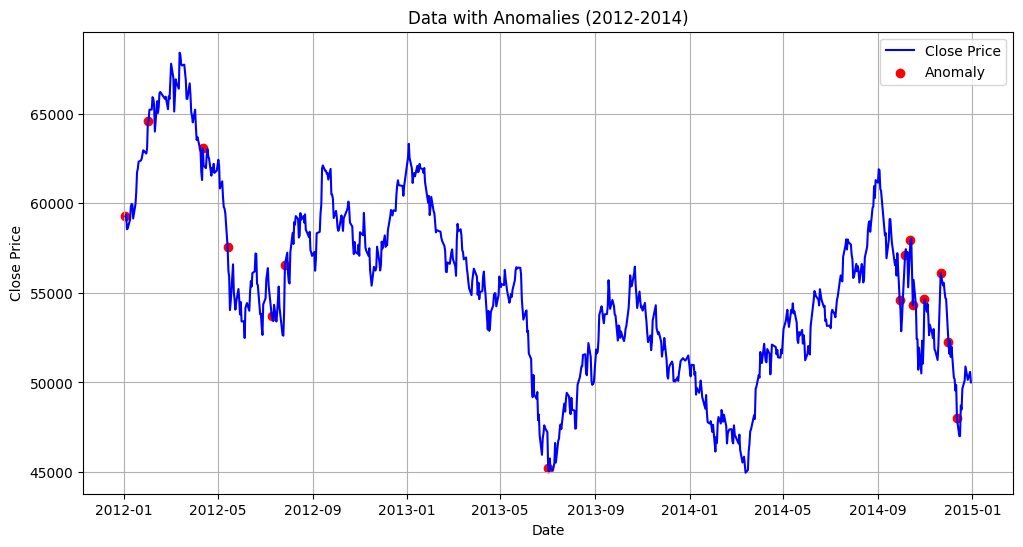

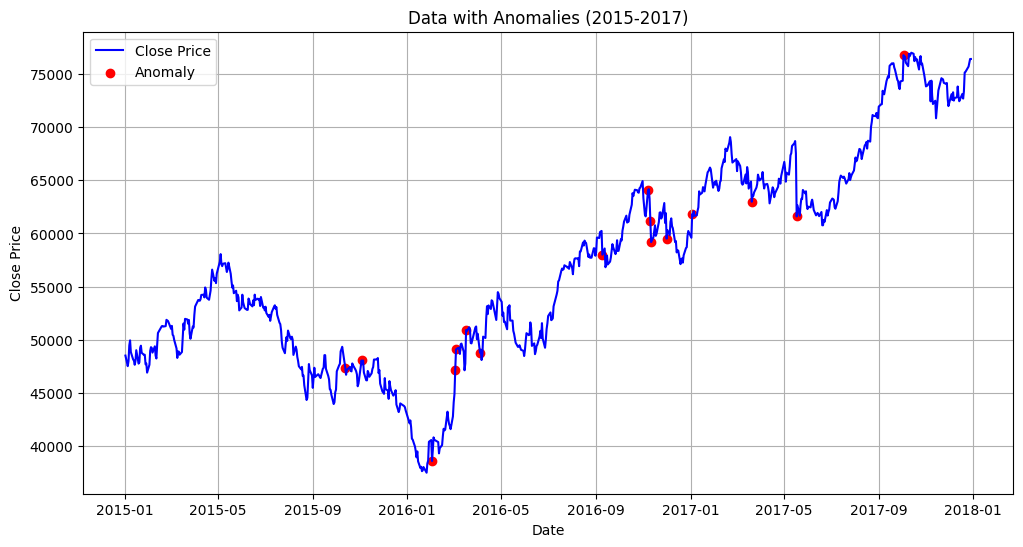

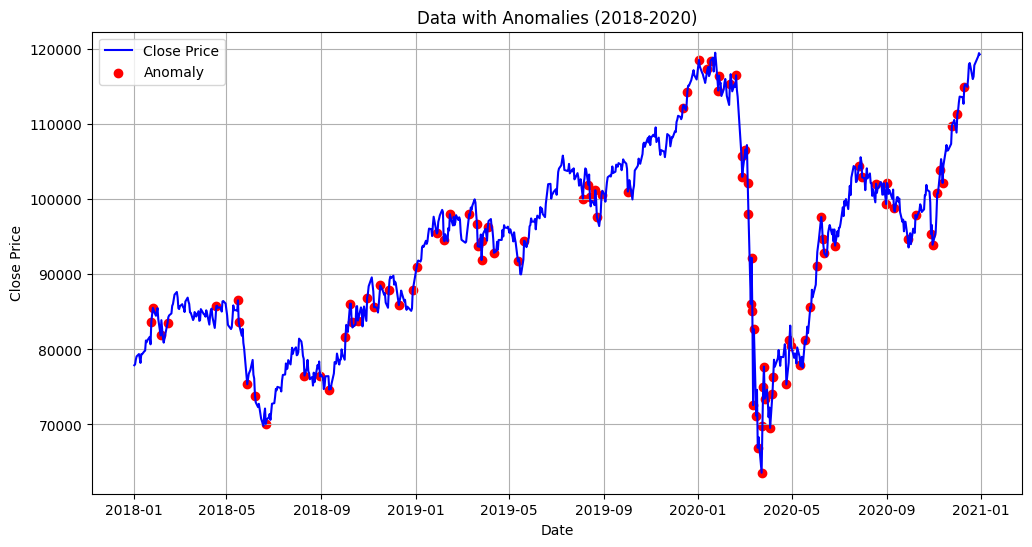

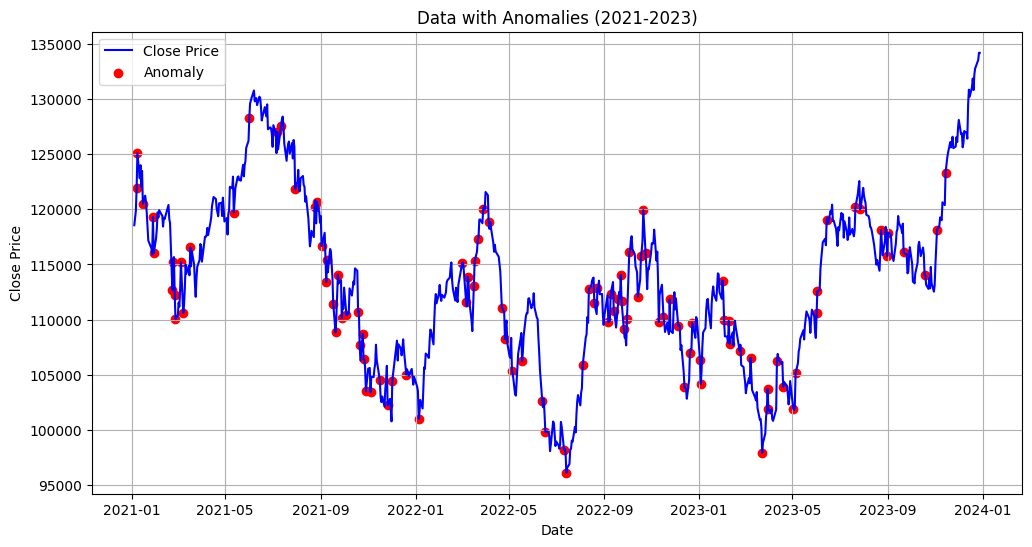

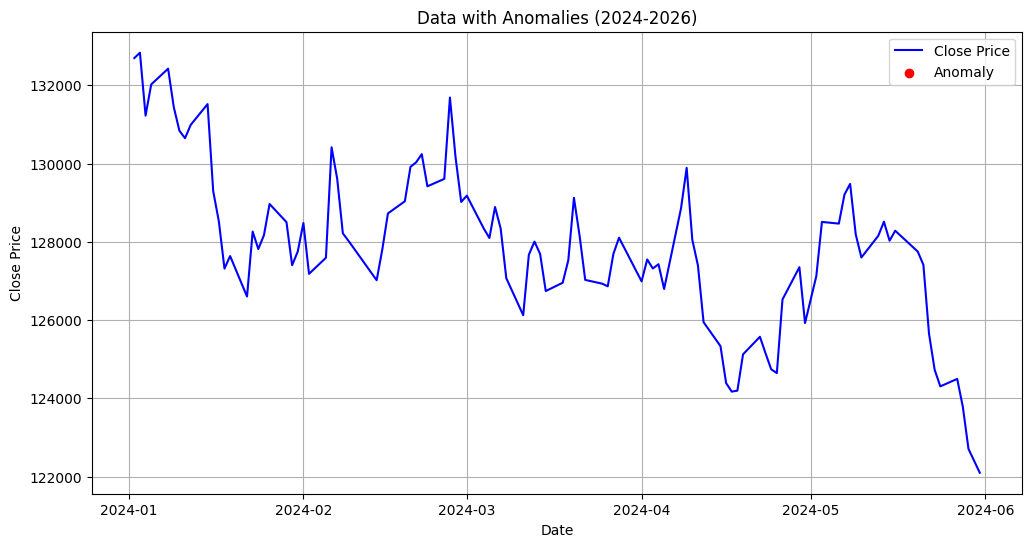

In [64]:
IBOV_3 = plot_with_anomalies(IBOV,IBOV_anomaly, 3)

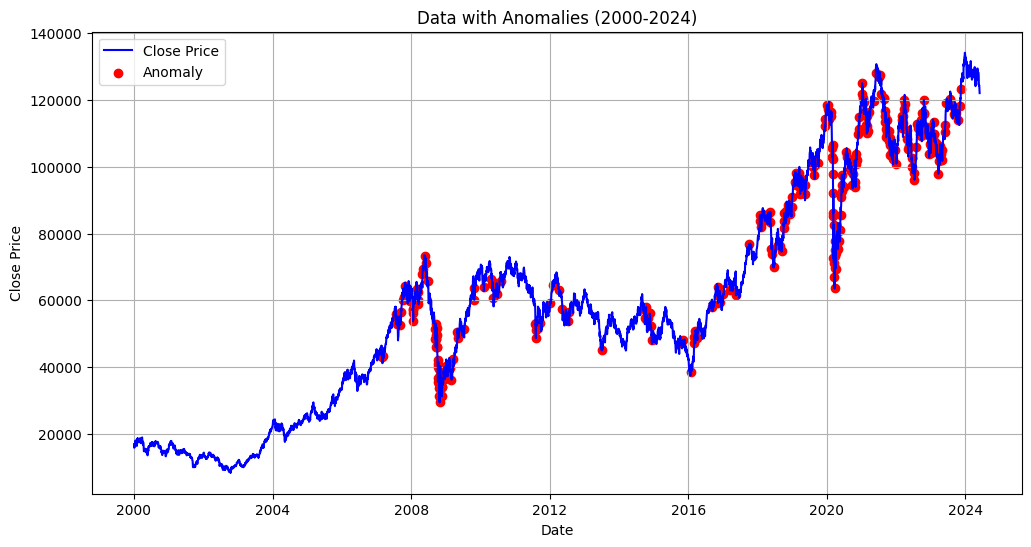

In [65]:
IBOV_all = plot_with_anomalies(IBOV, IBOV_anomaly, 25)